# PCA analysis results for the Erdös-Rényi networks case study


The following results are related to the Erdös-Rényi networks that were sampled in the ``2-multivariate-analysis/pca_analysis_er.ipynb`` notebook. Here, the sampled data generated in that notebook is used to create 2d and 3d scatterplots for the principal components for different combinations and directions of visualization. Lastly, a distance analysis is performed, where the euclidian distance between the original networks and its samples are obtained considering the scores from the 3 principal components that explain more variance in the data.

In [2]:
from samnet import *

Load data obtained for the ER networks case study:

In [3]:
df = pd.read_csv('2_multivariate_analysis/data/pca_er_robust_example2.csv')

In [4]:
df.shape

(37510, 50)

In [5]:
df.head()

,Assortativity,Transitivity,Av. shortest p.,Complexity Coef,1m Degree,2m Degree,3m Degree,4m Degree,H Degree,1m L. clustering,...,2m Eigenvector,3m Eigenvector,4m Eigenvector,H Eigenvector,len,method,net id,Component0,Component1,Component2
0,-0.001736,0.299868,1.700045,90.352486,89.686667,8103.413333,737585.306667,6.763238e+07,1.451012,0.299779,...,0.003333,0.000195,0.000011,0.000000,300,Original,0,1.988506,-0.060907,0.171548
1,-1.000000,0.000000,1.933333,15.000000,1.933333,29.000000,813.933333,2.357700e+04,0.063470,0.000000,...,0.033333,0.013973,0.008621,0.063470,30,SB,0,-0.458357,2.189602,-1.002531
2,-0.146497,0.000000,6.572414,2.133333,2.000000,4.266667,9.800000,2.466667e+01,0.264459,0.000000,...,0.033333,0.012771,0.005753,0.488053,30,RWS,0,-1.247991,0.124434,0.578724
3,-0.098884,0.336576,1.643678,10.884615,10.400000,113.200000,1286.800000,1.523560e+04,0.881242,0.338470,...,0.033333,0.006480,0.001308,0.235940,30,IRWS,0,1.122177,0.962162,1.054087
4,-0.269331,0.059406,3.259770,4.060606,2.200000,8.933333,61.800000,5.633333e+02,0.591543,0.082828,...,0.033333,0.011995,0.005507,0.528654,30,TR,0,-0.632729,0.484439,0.543687


## 2d Scatterplots for the 2 most important principal components (by explained variability)

In [6]:
plt.style.use('ggplot')

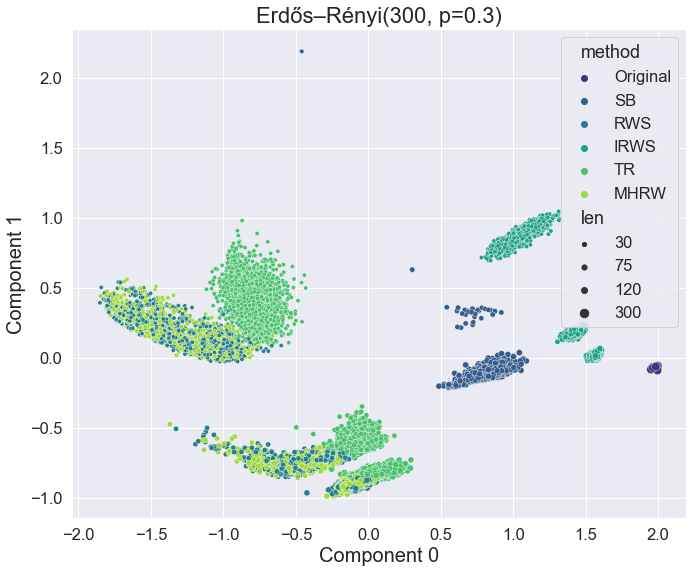

In [7]:
plt.figure(figsize=(11,9))
sns.set(font_scale = 1.5)
g = sns.scatterplot(data=df, x="Component0", y="Component1", size='len', hue="method", palette="viridis")
g.set_xlabel("Component 0",fontsize=20)
g.set_ylabel("Component 1",fontsize=20)
plt.title('Erdős–Rényi(300, p=0.3)',fontsize=22)
plt.savefig('images/er_2d_components', bbox_inches='tight', dpi=250)

## 3d Scatterplots for the 3 most important principal components (by explained variability)

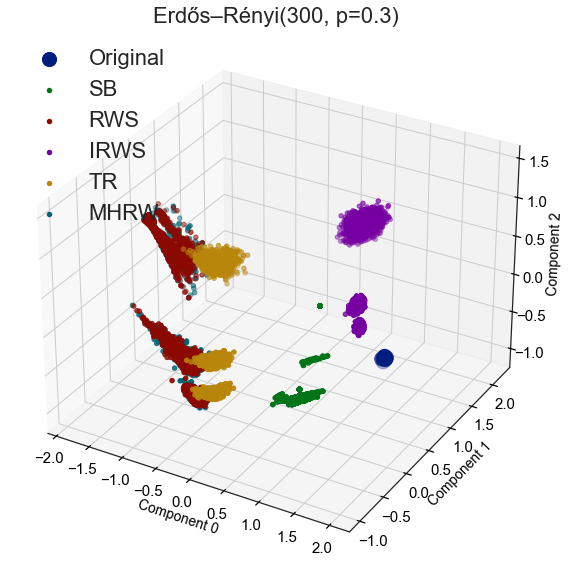

In [8]:
plt.style.use('seaborn-ticks')
plt.style.use('seaborn-dark-palette')

m = df["method"]
sizes = df["len"]

plt.rc('xtick', labelsize = 15, color='black') 
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111, projection='3d')

xs = df['Component0']
ys = df['Component1']
zs = df['Component2']


for method in m.unique():  
    if method == "Original":
        ax.scatter(xs[m.values == method], ys[m.values == method], zs[m.values == method], label = method, s = 200)
    else:
        ax.scatter(xs[m.values == method], ys[m.values == method], zs[m.values == method], label = method)

ax.legend(fontsize = 22, loc = 'upper left')

ax.set_xlabel('Component 0', fontsize = 14, color='black');
ax.set_ylabel('Component 1', fontsize = 14, color='black');
ax.set_zlabel('Component 2', fontsize = 14, color='black');

plt.tight_layout()
plt.title('Erdős–Rényi(300, p=0.3)',fontsize=22)
plt.savefig('images/er_3d_components', bbox_inches='tight', dpi=250)
plt.show()

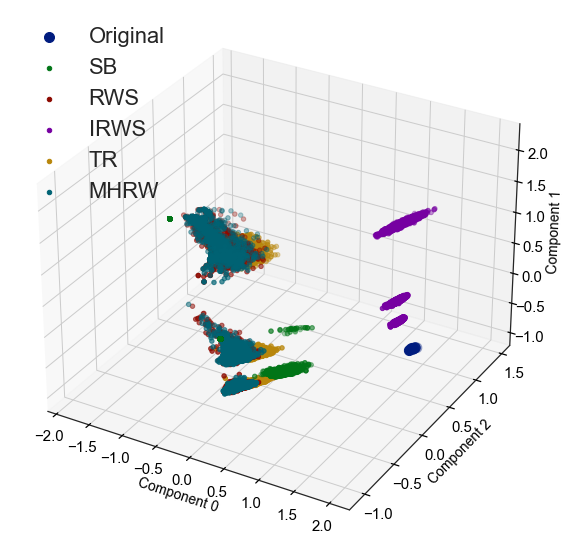

In [27]:
plt.style.use('seaborn-ticks')
plt.style.use('seaborn-dark-palette')

m = df["method"]
sizes = df["len"]

plt.rc('xtick', labelsize = 15, color='black') 
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111, projection='3d')

xs = df['Component0']
ys = df['Component2']
zs = df['Component1']


for method in m.unique():  
    if method == "Original":
        ax.scatter(xs[m.values == method], ys[m.values == method], zs[m.values == method], label = method, s = 100)
    else:
        ax.scatter(xs[m.values == method], ys[m.values == method], zs[m.values == method], label = method)

ax.legend(fontsize = 22, loc = 'upper left')

ax.set_xlabel('Component 0', fontsize = 14, color='black');
ax.set_ylabel('Component 2', fontsize = 14, color='black');
ax.set_zlabel('Component 1', fontsize = 14, color='black');

plt.tight_layout()
#plt.savefig('MaierPCA123_all.png', bbox_inches='tight', dpi = 200)
plt.show()

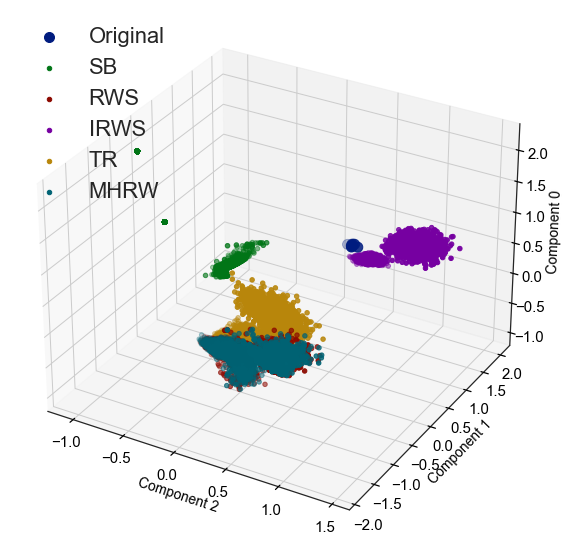

In [28]:
plt.style.use('seaborn-ticks')
plt.style.use('seaborn-dark-palette')

m = df["method"]
sizes = df["len"]

plt.rc('xtick', labelsize = 15, color='black') 
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111, projection='3d')

xs = df['Component2']
ys = df['Component0']
zs = df['Component1']

for method in m.unique():  
    if method == "Original":
        ax.scatter(xs[m.values == method], ys[m.values == method], zs[m.values == method], label = method, s = 100)
    else:
        ax.scatter(xs[m.values == method], ys[m.values == method], zs[m.values == method], label = method)

ax.legend(fontsize = 22, loc = 'upper left')

ax.set_xlabel('Component 2', fontsize = 14, color='black');
ax.set_ylabel('Component 1', fontsize = 14, color='black');
ax.set_zlabel('Component 0', fontsize = 14, color='black');

plt.tight_layout()
#plt.savefig('MaierPCA123_all.png', bbox_inches='tight', dpi = 200)
plt.show()

In [29]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


<br>
<br>
<br>

# Distances calculus

The following analysis obtains the mean and variance of the euclidean distances between the original networks and its samples considering each method and sample size. The distance is obtained using the scores of the 3 principal components that explain more variability in the data.

The "dfo" variable contains the scores for the components (Component0, Component1 and Component3) of the original ER networks.

In [30]:
dfo = df[df['method']=='Original'][['net id', 'Component0', 'Component1', 'Component2']]

In [31]:
dfo

,net id,Component0,Component1,Component2
0,0,1.988506,-0.060907,0.171548
3751,1,1.960693,-0.064120,0.139618
7502,2,1.959712,-0.068891,0.178542
11253,3,1.998594,-0.057924,0.198258
15004,4,1.997059,-0.054066,0.192033
18755,5,1.990022,-0.057552,0.179149
22506,6,1.995103,-0.087564,0.230712
26257,7,1.949930,-0.081200,0.183614
30008,8,1.964384,-0.070353,0.189036
33759,9,1.983307,-0.061216,0.178668


Then, this dataframe is left joined considering the net id to the original dataframe so each sample row also contains the score of the corresponding original network from where it was obtained:

In [32]:
merged = df.merge(dfo, how='left', on='net id')

In [33]:
merged = merged[['len', 'method', 'net id', 'Component0_x', 'Component1_x' , 'Component2_x', 'Component0_y', 'Component1_y' , 'Component2_y']].copy()

The distances are then calculated considering the euclidean distance for each sample:
$$d = \sqrt{(C0_{original} - C0_{sampled})^2 + (C1_{original}- C1_{sampled})^2 + (C2_{original} - C2_{sampled})^2}$$

In [34]:
merged['distance'] = np.sqrt((merged['Component0_x'] - merged['Component0_y'])**2 + 
                             (merged['Component1_x'] - merged['Component1_y'])**2 + 
                             (merged['Component2_x'] - merged['Component2_y'])**2)

In [35]:
distances_df = merged[['method', 'len', 'distance']].copy()

In [36]:
distances_df = distances_df[distances_df.method!='Original']

Finally, the mean and variance of the distances for each combination of method and sample size (len) are obtained:

In [37]:
distances_df.groupby(by=['method', 'len']).agg(["mean", "var"]).sort_values(by='len').reset_index()

method  len  distance          
                    mean       var
0    IRWS   30  1.632597  0.001449
1    MHRW   30  3.496582  0.083118
2     RWS   30  3.483700  0.088687
3      SB   30  3.526691  0.000304
4      TR   30  2.838798  0.011309
5    IRWS   75  0.726609  0.000427
6    MHRW   75  2.501700  0.015111
7     RWS   75  2.501771  0.015304
8      SB   75  2.192377  0.011989
9      TR   75  2.141642  0.004738
10   IRWS  120  0.489558  0.000303
11   MHRW  120  2.289531  0.004056
12    RWS  120  2.286084  0.004022
13     SB  120  1.438382  0.008267
14     TR  120  2.133053  0.006035

In [39]:
print(distances_df.groupby(by=['method', 'len']).agg(["mean", "var"]).sort_values(by='len').reset_index().to_latex())

\begin{tabular}{llrrr}
\toprule
{} & method &  len & \multicolumn{2}{l}{distance} \\
{} &      mean &       var \\
\midrule
0  &   IRWS &   30 &  1.632597 &  0.001449 \\
1  &   MHRW &   30 &  3.496582 &  0.083118 \\
2  &    RWS &   30 &  3.483700 &  0.088687 \\
3  &     SB &   30 &  3.526691 &  0.000304 \\
4  &     TR &   30 &  2.838798 &  0.011309 \\
5  &   IRWS &   75 &  0.726609 &  0.000427 \\
6  &   MHRW &   75 &  2.501700 &  0.015111 \\
7  &    RWS &   75 &  2.501771 &  0.015304 \\
8  &     SB &   75 &  2.192377 &  0.011989 \\
9  &     TR &   75 &  2.141642 &  0.004738 \\
10 &   IRWS &  120 &  0.489558 &  0.000303 \\
11 &   MHRW &  120 &  2.289531 &  0.004056 \\
12 &    RWS &  120 &  2.286084 &  0.004022 \\
13 &     SB &  120 &  1.438382 &  0.008267 \\
14 &     TR &  120 &  2.133053 &  0.006035 \\
\bottomrule
\end{tabular}

